<a href="https://colab.research.google.com/github/lucasresck/FGV-EMAp/blob/master/Modeling%20Biological%20Phenomena/A1%20assignment/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulação computacional de processos evolutivos e seleção natural

Existe um ambiente com vários indivíduos de certa espécie iniciados igualmente e várias comidas. As comidas são "distribuídas" aos indivíduos de maneira aleatória, de acordo com seu grau de adaptação, este afetada pelas suas características. Esses indivíduos têm característica de velocidade
Cada indivíduo também tem energia, que indica em quantas "rodadas" de distribuição de comida eles poderão participar. A energia também é afetada pelas características.
A cada dia, os indivíduos têm chance de conseguir 1 comida (e sobreviverem) ou 2 comidas (sobreviverem e se replicarem). Cada reprodução tem uma chance de mutação em cada característica.

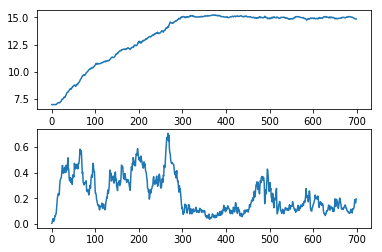

In [123]:
import random
import time
import matplotlib.pyplot as plt
import statistics
import numpy as np

random.seed(time.time())

class Environment:
    def __init__(self, n, speed, nFood, mutation):
        self.n = n
        self.speed = speed
        self.nFood = nFood
        self.mutation = mutation
        self.getIndividuals()
        self.dataMean = []
        self.dataVariance = []

    def getIndividuals(self):
        self.individuals = [Individual(speed = self.speed, nFood = self.nFood) for i in range(self.n)]

    def run(self, days):
        self.days = days
        for day in range(days):
            #print(day, len(self.individuals))

            individualsThisDay = self.individuals.copy()
            for epoch in range(self.nFood):  #Who entered here is guaranteed that has energy and is not full of food
                for individual in individualsThisDay.copy():
                    if individual.energy == epoch + 1 or individual.food == 2 or individual.energy == 0:
                        individualsThisDay.remove(individual)
                self.sortFood(individualsThisDay)
            #count = 0
            for individual in self.individuals.copy():
                if individual.food == 0:
                    #count += 1
                    self.individuals.remove(individual)
                elif individual.food == 2:
                    self.reprodution(individual)
                individual.food = 0
            self.record()
            
    def sortFood(self, individualsThisDay):
        sumFitness = 0
        for individual in individualsThisDay:
            sumFitness += individual.fitness
        lucky = random.random()*sumFitness
        for i, individual in enumerate(individualsThisDay):
            if lucky < individual.fitness:
                individual.food += 1
                break
            else:
                lucky -= individual.fitness

    def reprodution(self, individual):
        dice = random.random()
        newSpeed = individual.speed
        if dice < self.mutation:
            newSpeed += random.random()*2 - 1
        self.individuals.append(Individual(speed = newSpeed, nFood = self.nFood))

    def record(self):
        self.dataMean.append(sum([individual.fitness for individual in self.individuals])/len(self.individuals))
        self.dataVariance.append(statistics.variance([individual.fitness for individual in self.individuals]))
        #print(self.data[-1])

    def plot(self):
        fig, (ax1, ax2) = plt.subplots(2, 1)
        t = np.arange(0, self.days)
        ax1.plot(t, self.dataMean)
        ax2.plot(t, self.dataVariance)
        plt.show()

class Individual:
    def __init__(self, speed, nFood):
        self.speed = speed
        self.nFood = nFood
        self.energy = 2*self.nFood - speed**2  # A velocidade tem um custo para a energia
        if self.energy < 0:
            self.energy = 0
        self.fitness = speed  # Fitness é o grau de adaptação de um indíviduo; quanto maior, melhor
        self.food = 0

env = Environment(n = 200, speed = 7, nFood = 120, mutation = 0.1)
env.run(days = 700)
env.plot()